In [36]:
import tensorflow as tf
print(tf.test.gpu_device_name())

/device:GPU:0


In [1]:
%pip install tensorflow-directml numpy pandas scikit-learn

  Using cached numpy-1.18.5-cp37-cp37m-win_amd64.whl.metadata (2.1 kB)
  Using cached tensorboard-1.15.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_estimator-1.15.1-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflow_estimator-1.15.1-py2.py3-none-any.whl (503 kB)
Using cached numpy-1.18.5-cp37-cp37m-win_amd64.whl (12.7 MB)
Using cached tensorboard-1.15.0-py3-none-any.whl (3.8 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successfully uninstalled tensorboard-2.11.2
Note: you may need to restart the kernel to use upd

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
tensorflow-intel 2.11.0 requires tensorboard<2.12,>=2.11, but you have tensorboard 1.15.0 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 1.15.1 which is incompatible.


In [ ]:
import numpy as np

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

In [ ]:
import tensorflow as tf
import time

# Cek apakah GPU tersedia
print("GPU Available:", tf.test.is_gpu_available())

# Pastikan TensorFlow menggunakan GPU
with tf.device('/GPU:0'):
    a = tf.constant([[2.0, 3.0], [4.0, 5.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0]])

    start = time.time()
    result = tf.matmul(a, b)  # Operasi perkalian matriks
    end = time.time()

    print("Hasil Perhitungan:", result)
    print(f"Waktu Eksekusi: {end - start:.6f} detik")


GPU Available: True
Hasil Perhitungan: Tensor("MatMul:0", shape=(2, 2), dtype=float32, device=/device:GPU:0)
Waktu Eksekusi: 0.080286 detik


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Cek versi TensorFlow
print("TensorFlow version:", tf.__version__)

# Contoh dataset sederhana (AND Gate)
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [0], [0], [1]], dtype=np.float32)

# Definisi model
model = Sequential(
    [
        Dense(4, input_dim=2, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

# Kompilasi model
model.compile(optimizer="SGD", loss="binary_crossentropy", metrics=["accuracy"])

# Callback untuk menyimpan model terbaik
checkpoint = ModelCheckpoint(
    "best_model.h5", monitor="accuracy", save_best_only=True, mode="max"
)

# Konfigurasi sesi TensorFlow untuk menggunakan DirectML jika tersedia
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # Memungkinkan penggunaan GPU secara dinamis
session = tf.Session(config=config)

# Cek apakah DirectML tersedia
device_name = "/device:DML:0"

try:
    with tf.device(device_name):
        print("Training menggunakan DirectML (GPU)")
        with session.as_default():
            model.fit(x, y, epochs=100, verbose=1, callbacks=[checkpoint])
except RuntimeError as e:
    print("Gagal menggunakan DirectML, menggunakan CPU sebagai fallback.")
    print("Error:", e)
    with session.as_default():
        model.fit(x, y, epochs=100, verbose=1, callbacks=[checkpoint])


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: initialization failed

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model
model = Sequential(
    [
        Dense(4, input_dim=2, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

# Compile the model
model.compile(optimizer="SGD", loss="binary_crossentropy", metrics=["accuracy"])

# Define model checkpoint callback
checkpoint = ModelCheckpoint(
    "best_model.h5", monitor="accuracy", save_best_only=True, mode="max"
)

# Fit the model using CPU
with tf.device("/cpu:0"):
    model.fit(x, y, epochs=1000, verbose=1, callbacks=[checkpoint])

Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 0s 43ms/sample - loss: 0.7058 - acc: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7046 - acc: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7032 - acc: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7018 - acc: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7004 - acc: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6990 - acc: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.6976 - acc: 0.5000
Epoch 8/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6962 - acc: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.6949 - acc: 0.5000
Epoch 10/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.6935 - acc: 0.5000
Epoch 11/1000
4/4 [==========

In [ ]:
z = np.array([[1, 0]])
predictions = model.predict(x)
print("Prediksi:")
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Prediksi:
[[2.0118849e-03]
 [8.2754379e-04]
 [1.1830297e-04]
 [9.9969161e-01]]


In [38]:
binary_predictions = (predictions > 0.5).astype(int)
print("Prediksi:")
print(binary_predictions)

Prediksi:
[[0]
 [0]
 [0]
 [1]]


In [20]:
import tensorflow as tf

print("Devices available:", tf.config.experimental.list_physical_devices())

# Menetapkan TensorFlow agar menggunakan DirectML jika tersedia
try:
    gpu_devices = tf.config.experimental.list_physical_devices("GPU")
    if gpu_devices:
        tf.config.experimental.set_memory_growth(gpu_devices[0], True)
        print("Using GPU:", gpu_devices[0])
    else:
        print("No GPU found. Running on CPU.")
except:
    print("No GPU found. Running on CPU.")


AttributeError: module 'tensorflow' has no attribute 'config'

In [19]:
import tensorflow as tf

with tf.device("/device:DML:0"):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
    c = tf.matmul(a, b)
    print(c)


Tensor("MatMul_1:0", shape=(2, 2), dtype=float32, device=/device:DML:0)


In [18]:
import tensorflow as tf

print(tf.test.is_gpu_available())


True


In [12]:
print(tf.config.list_physical_devices("DML"))


AttributeError: module 'tensorflow' has no attribute 'config'

In [17]:
import tensorflow as tf

# Cek apakah TensorFlow benar-benar menggunakan DirectML
with tf.device("/device:GPU:0"):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[5.0, 6.0], [7.0, 8.0]])
    c = tf.matmul(a, b)  # Operasi matrix multiplication

    with tf.Session() as sess:
        result = sess.run(c)
        print("Hasil operasi di DirectML:", result)


InvalidArgumentError: Cannot assign a device for operation 'Variable_1': Could not satisfy explicit device specification '/device:GPU:0' because no supported kernel for GPU devices is available.
Colocation Debug Info:
Colocation group had the following types and devices: 
VariableV2: CPU 
IsVariableInitialized: CPU 
Identity: GPU CPU 
Assign: CPU 
	 [[Node: Variable_1 = VariableV2[container="", dtype=DT_INT64, shape=[], shared_name="", _device="/device:GPU:0"]()]]

Caused by op 'Variable_1', defined at:
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelapp.py", line 619, in start
    self.io_loop.start()
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\ioloop.py", line 741, in _run_callback
    ret = callback()
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\ipkernel.py", line 302, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\zmqshell.py", line 539, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-4e8286d08d3a>", line 25, in <module>
    result = sess.run(fibonacci(n))
  File "<ipython-input-2-4e8286d08d3a>", line 9, in fibonacci
    b = tf.Variable(1, dtype=tf.int64)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\ops\variables.py", line 229, in __init__
    constraint=constraint)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\ops\variables.py", line 351, in _init_from_args
    name=name)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\ops\state_ops.py", line 133, in variable_op_v2
    shared_name=shared_name)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 1353, in _variable_v2
    shared_name=shared_name, name=name)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'Variable_1': Could not satisfy explicit device specification '/device:GPU:0' because no supported kernel for GPU devices is available.
Colocation Debug Info:
Colocation group had the following types and devices: 
VariableV2: CPU 
IsVariableInitialized: CPU 
Identity: GPU CPU 
Assign: CPU 
	 [[Node: Variable_1 = VariableV2[container="", dtype=DT_INT64, shape=[], shared_name="", _device="/device:GPU:0"]()]]


In [5]:
import tensorflow as tf

# Paksa penggunaan GPU jika terdeteksi
try:
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        print("Menggunakan GPU NVIDIA")
        tf.config.experimental.set_memory_growth(gpus[0], True)
    else:
        print("Fallback ke CPU")
except Exception as e:
    print("Error saat mengatur GPU:", e)


Error saat mengatur GPU: module 'tensorflow' has no attribute 'config'


In [20]:
%pip uninstall tensorflow
%pip install tensorflow-gpu==1.12

Note: you may need to restart the kernel to use updated packages.


Skipping tensorflow as it is not installed.


  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
Note: you may need to restart the kernel to use updated packages.


tensorflow-directml 1.15.8 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.12.2 which is incompatible.
You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
import tensorflow as tf

# Cek daftar perangkat yang tersedia
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# Pastikan TensorFlow pakai GPU
if tf.test.is_gpu_available():
    print("✅ TensorFlow sudah menggunakan GPU")
else:
    print("❌ TensorFlow masih pakai CPU")


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12864002291724116794
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 262412699
locality {
  bus_id: 1
}
incarnation: 288855634443400520
physical_device_desc: "device: 0, name: GeForce GT 730M, pci bus id: 0000:03:00.0, compute capability: 3.5"
]
✅ TensorFlow sudah menggunakan GPU


In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.test.is_gpu_available())


c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\a

TensorFlow version: 1.5.0
GPU Available: False


In [ ]:
%pip uninstall tensorflow tensorflow-gpu
%pip install tensorflow-gpu==1.5


^C
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.test.is_gpu_available())
print("List of GPUs:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 1.5.0
GPU Available: True


AttributeError: module 'tensorflow' has no attribute 'config'

In [4]:
import tensorflow as tf
import time

# Pastikan TensorFlow menggunakan DirectML
with tf.device("/device:GPU:0"):
    print("Menggunakan GPU DirectML untuk komputasi...")

    # Membuat dua matriks besar (ukuran 4000x4000)
    a = tf.random.uniform([4000, 4000], dtype=tf.float32)
    b = tf.random.uniform([4000, 4000], dtype=tf.float32)

    # Operasi matrix multiplication
    c = tf.matmul(a, b)

    # Eksekusi di dalam session
    with tf.Session() as sess:
        start_time = time.time()
        result = sess.run(c)
        end_time = time.time()

        print("Waktu eksekusi:", end_time - start_time, "detik")


Menggunakan GPU DirectML untuk komputasi...


AttributeError: module 'tensorflow' has no attribute 'random'

In [2]:
import tensorflow as tf
import time

n = 50000  # Ubah ke angka besar untuk stress test


def fibonacci(n):
    a = tf.Variable(0, dtype=tf.int64)
    b = tf.Variable(1, dtype=tf.int64)

    for _ in range(n):
        temp = a + b
        a = b
        b = temp
    return b


# Jalankan di DirectML
with tf.device("/device:GPU:0"):
    print("Menghitung Fibonacci di GPU...")
    start_time = time.time()

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        result = sess.run(fibonacci(n))

    end_time = time.time()

print(f"Hasil Fibonacci ke-{n}:", result)
print("Waktu eksekusi:", end_time - start_time, "detik")


Menghitung Fibonacci di GPU...


KeyboardInterrupt: 

In [25]:
import tensorflow as tf
from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.callbacks import ModelCheckpoint
import time


# # Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# # Normalisasi data ke range 0-1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# # Konversi label ke one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# # Model CNN untuk CIFAR-10
def create_model():
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(10, activation="softmax"),
        ]
    )
    return model

# # Kompilasi model
model = create_model()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# # Define model checkpoint callback
checkpoint = ModelCheckpoint("model_CNN3.h5", monitor="val_acc", save_best_only=True, mode="max")

# # # Jalankan training di GPU jika tersedia
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True

try:
    with tf.device("/device:COU:0"):
        print('Training menggunakan GPU...')
        start_time = time.time()
        history = model.fit(
            x_train,
            y_train,
            epochs=1,
            batch_size=64,
            validation_data=(x_test, y_test),
            callbacks=[checkpoint],
            verbose=1,
        )
        end_time = time.time()
        print(f"Waktu yang dibutuhkan untuk 1 epoch: {end_time - start_time:.2f} detik")
except RuntimeError as e:
    print("Gagal menggunakan GPU, fallback ke CPU.")
    print("Error:", e)
    history = model.fit(
        x_train,
        y_train,
        epochs=10,
        batch_size=64,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint],
        verbose=1,
    )



Training menggunakan GPU...
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================]50000/50000 [==============================] - 55s 1ms/step - loss: 1.5475 - acc: 0.4290 - val_loss: 1.3253 - val_acc: 0.5341

Waktu yang dibutuhkan untuk 1 epoch: 56.07 detik


In [4]:
import os
import time
import tensorflow as tf

# Matikan GPU sebelum eksekusi CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

with tf.device("/device:CPU:0"):
    print('Training menggunakan CPU...')
    start_time = time.time()
    history = model.fit(
        x_train,
        y_train,
        epochs=1,
        batch_size=64,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint],
        verbose=1,
    )
    end_time = time.time()
    print(f"Waktu yang dibutuhkan untuk 1 epoch: {end_time - start_time:.2f} detik")


Training menggunakan CPU...
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================]50000/50000 [==============================] - 58s 1ms/step - loss: 1.1838 - acc: 0.5775 - val_loss: 1.0983 - val_acc: 0.6062

Waktu yang dibutuhkan untuk 1 epoch: 57.98 detik


In [10]:
import tensorflow as tf

print("Devices available:", tf.Session().list_devices())

Devices available: [_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456), _DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 155130267)]


In [11]:
import tensorflow as tf

# Cek apakah GPU tersedia
print("Apakah GPU tersedia?", tf.test.is_gpu_available())

# Menampilkan daftar perangkat yang tersedia
from tensorflow.python.client import device_lib
print("Daftar perangkat yang terdeteksi:")
print(device_lib.list_local_devices())


Apakah GPU tersedia? True
Daftar perangkat yang terdeteksi:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10857379069640336798
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 155130267
locality {
  bus_id: 1
}
incarnation: 7172878288344392020
physical_device_desc: "device: 0, name: GeForce GT 730M, pci bus id: 0000:03:00.0, compute capability: 3.5"
]


In [24]:
import tensorflow as tf

# Dapatkan konfigurasi perangkat dari TensorFlow
devices = tf.Session().list_devices()
cpu_info = [device for device in devices if 'CPU' in device.name]
gpu_info = [device for device in devices if 'GPU' in device.name]

print("Informasi CPU:")
print(cpu_info)

print("Informasi GPU:")
print(gpu_info)

# Informasi jumlah core CPU
print(f"Jumlah core CPU: {cpu_cores}")
print(f"Jumlah GPU: {len(gpu_info)}")
print(f"CUDA GPU: {tf.test.is_built_with_cuda()}")
print(f"Jumlah CUDA GPU: {len(gpu_info)}")


Informasi CPU:
[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456)]
Informasi GPU:
[_DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 155130267)]
Jumlah core CPU: 4
Jumlah GPU: 1
CUDA GPU: True
Jumlah CUDA GPU: 1


In [38]:
%pip uninstall tensorflow-directml

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from IPython.display import clear_output

# Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi data ke range 0-1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Konversi label ke one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model CNN untuk CIFAR-10
def create_model():
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Conv2D(
                32, (3, 3), activation="relu", input_shape=(32, 32, 3)
            ),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(10, activation="softmax"),
        ]
    )
    return model


# Kompilasi model
model = create_model()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Define model checkpoint callback
checkpoint = ModelCheckpoint(
    "model_CNN2.h5", monitor="val_acc", save_best_only=True, mode="max"
)

# Gunakan DirectML jika tersedia
try:
    with tf.device("/device:DML:0"):
        print("Training dengan DirectML (GPU AMD)")
        history = model.fit(
            x_train,
            y_train,
            epochs=100,
            batch_size=64,
            validation_data=(x_test, y_test),
            callbacks=[checkpoint],
            verbose=1,
        )
except Exception as e:
    print("Gagal menggunakan DirectML, fallback ke CPU.")
    print("Error:", e)
    history = model.fit(
        x_train,
        y_train,
        epochs=10,
        batch_size=64,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint],
        verbose=2,
    )

Training dengan DirectML (GPU AMD)
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
24960/50000 [=============>................] - ETA: 46s - loss: 1.7362 - acc: 0.3505

KeyboardInterrupt: 

In [ ]:
# Load model from checkpoint
model.load_weights("model_CNN2.h5")

# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Akurasi pada dataset uji:", test_acc)

10000/10000 [==============================] - 2s 238us/sample - loss: 0.9288 - acc: 0.7221
Akurasi pada dataset uji: 0.72209996


In [ ]:
# Mencari epoch dengan akurasi validasi terbaik
best_epoch = max(enumerate(history.history["val_acc"]), key=lambda x: x[1])

# Menampilkan epoch terbaik
print(
    f"Epoch terbaik: {best_epoch[0] + 1} dengan akurasi validasi: {best_epoch[1]:.4f}"
)


Epoch terbaik: 12 dengan akurasi validasi: 0.7221


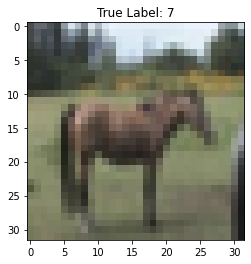

Predicted Label: 7


In [47]:
import numpy as np

import matplotlib.pyplot as plt

# Select a single image from the test set
index = 9999  # Change this index to test different images
test_image = x_test[index]
test_label = y_test[index]

# Display the image
plt.imshow(test_image)
plt.title(f"True Label: {np.argmax(test_label)}")
plt.show()

# Preprocess the image
test_image = np.expand_dims(test_image, axis=0)

# Predict the label of the image
predicted_label = model.predict(test_image)
predicted_class = np.argmax(predicted_label)

print(f"Predicted Label: {predicted_class}")